### Sea Level Predictor

By using scipy.stats on a basic level, along pandas and matplotlib, this project aims to show how to visualise tendencies on a basic level through functions by using data provided by a database.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv('epa-sea-level.csv')

In [3]:
df.index = df['Year']
df.drop('Year', axis=1, inplace=True)
df

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
1880,0.000000,-0.952756,0.952756,NaN
1881,0.220472,-0.732283,1.173228,NaN
1882,-0.440945,-1.346457,0.464567,NaN
1883,-0.232283,-1.129921,0.665354,NaN
1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...
2009,8.586614,8.311024,8.862205,8.046354
2010,8.901575,8.618110,9.185039,8.122973
2011,8.964567,8.661417,9.267717,8.053065


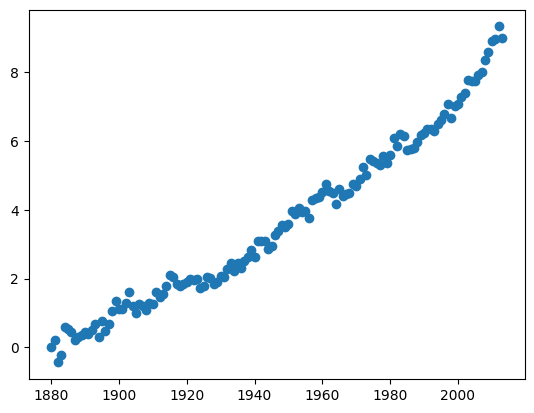

In [4]:
plt.scatter(df.index, df.iloc[:, 0]);

Function based on the whole dataset's data range (1880 - 2014).

In [5]:
x = df.index
y = df.iloc[:, 0]
result = linregress(x, y)

print(f"Intercept: {result.intercept}, Slope: {result.slope}")

Intercept: -119.06594196773978, Slope: 0.0630445840121348


Sea Level Rise prediction for 2050, using data from back to 1880.

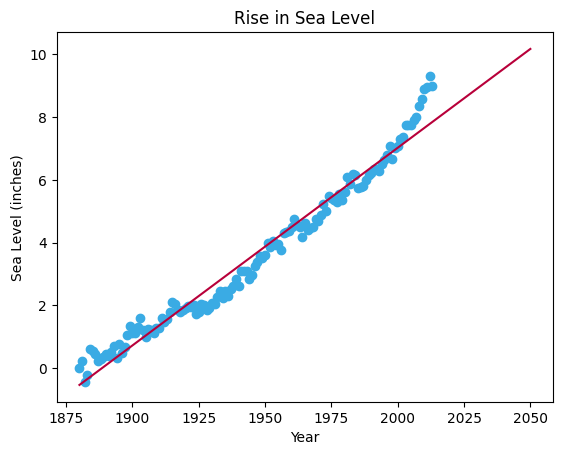

In [6]:
x_fit = np.arange(x.min(), 2051)
y_fit = result.slope * x_fit + result.intercept

fig, ax = plt.subplots()

ax.scatter(x, y, color="#3AABE4")
ax.plot(x_fit, y_fit, color="#B8003A")
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level');

Function based on recent data (2000 - 2014).

In [7]:
df_new = df[df.index >= 2000]
x_new = df_new.index
y_new = df_new.iloc[:, 0]
result_new = linregress(x_new, y_new)

print(f"Intercept: {result_new.intercept}, Slope: {result_new.slope}")

Intercept: -325.7934668059649, Slope: 0.1664272733318682


Sea Level Rise prediction for 2050, using data only after the year 2000.

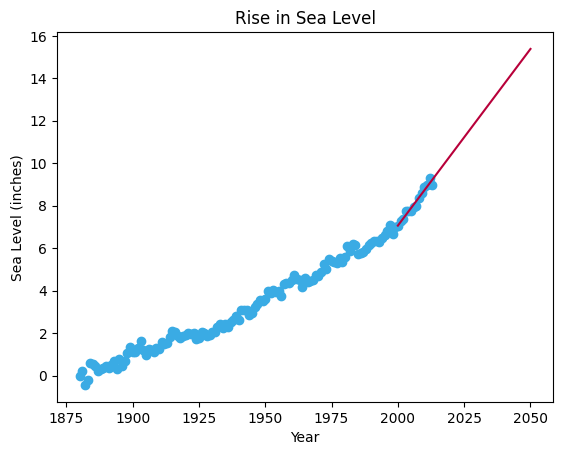

In [8]:
x_fit_new = np.arange(2000, 2051)
y_fit_new = result_new.slope * x_fit_new + result_new.intercept

fig, ax = plt.subplots()

ax.scatter(x, y, color="#3AABE4")
ax.plot(x_fit_new, y_fit_new, color="#B8003A")
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level');

Based on the analysis, the predicted sea level rise by 2050 differs significantly depending on the data period used.
Using the entire dataset since 1880, the projected rise is approximately 10 inches. However, restricting the analysis to data from the year 2000 onwards yields a much steeper trend, predicting a rise closer to 16 inches by 2050.
This sharp increase in the recent rate of sea level rise likely reflects the accelerating impact of human activity and climate change on global sea levels.